### HW3 – statistics and data analysis
**Differential Gene Expression in Acute Myocardial Infraction**

### IDs:
Insert yours IDs to the cell below

### 1. Introduction
Gene expression describes the process in which genes that are coded 
in the DNA of living organisms are transcribed into mRNA. This is part 
of the bigger process in which genes are being copied (transcribed), 
processed, translated and modified into the final product, usually a 
protein. Gene expression profiling measures the levels at which 
mRNA molecules pertaining to the genes profiled are observed in a 
sample.
In this exercise, we will perform guided analysis, comparing
expression profiles of circulating endothelial cells (CECs) in patients 
with acute myocardial infraction to CECs in healthy controls. A 
comparison of two sample classes.

### 2. The Data Set
The data set was taken from:
1) Dataset record in NCBI:
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE
66360
2) Published paper: Muse et al, Sci Rep 2017
https://www.nature.com/articles/s41598-017-12166-0

We extracted the data matrix and provide it as a separate csv 
attachment (link to download). The csv file needs to be pre-processed
before moving to the main analysis steps. Some information should 
be removed but make sure that you keep all information that is
important for the analysis. Specifically, all expression values should 
be kept and the label of each sample (H – Healthy, M - Myocardial 
Infraction).
The paper describes a study that seeks to develop an expressionbased signature that can detect AMI in patients in a non-invasive
manner, by profiling CECs. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import ranksums, ttest_ind, spearmanr, rankdata
from tqdm.notebook import tqdm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

***Data pre-processing***

In [2]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', index_col=0, header=None, skiprows=59, encoding = "iso-8859-1")
df.drop('ID_REF',axis=0, inplace=True)

In [3]:
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
0,,,,,,,,,,,,,,,,,,,,,
Class,H,H,H,H,H,H,H,H,H,H,...,M,M,M,M,M,M,M,M,M,M
1007_s_at,5.866377893,4.948736331,5.148384393,5.064418945,5.017832878,5.116153518,5.431328058,5.235270857,5.773528455,6.016415473,...,5.419481538,5.057716465,5.996493392,5.343132759,5.558892254,6.472517225,5.678815851,5.653286378,6.013841046,5.465333944
1053_at,8.22579012,7.525865369,7.764636529,7.198461482,7.831450258,7.203591859,7.694550756,7.760259212,8.279814404,7.580840863,...,7.226347747,7.105537863,5.354105386,8.271499725,5.96334574,8.261421952,6.925752665,7.918424183,7.442701377,9.225221352
117_at,6.17973231,6.628137025,5.859151477,5.974135101,6.793079158,6.43522914,6.320546126,6.48359047,6.387779205,6.307065808,...,6.789500767,7.441939912,7.026928573,6.003972814,7.474325713,6.367759272,6.835755831,7.577034915,7.147417202,6.48112813
121_at,6.179477974,6.58288903,6.602134766,6.545904723,5.911542321,6.28542026,6.562315839,6.345887555,6.27280582,5.971847425,...,6.513436777,6.317522639,7.413453376,6.809103167,5.949091368,6.440978114,6.955883278,6.499215058,6.587065112,6.897590966
1255_g_at,2.792047952,2.69571445,2.580181122,2.712123845,2.723686912,2.70668403,2.674746672,2.635149735,2.696649177,2.802862883,...,2.924657514,2.714103313,3.635944854,2.710943641,2.979380765,3.73013912,2.914867562,3.013901455,2.729319786,3.151449425
1294_at,9.290410779,9.462275035,9.116776316,9.134584186,9.582343511,9.538661422,9.837551637,10.11188891,9.629918501,9.163517217,...,8.596478981,7.946866042,8.57628061,8.762451755,7.143351687,7.355729877,7.944294937,8.563122679,8.699221635,8.194374083
1316_at,6.998285145,6.558214949,6.851622539,7.357827486,7.283872601,7.43717345,7.127690377,8.214922404,7.415155953,6.822991034,...,5.867730571,5.939551491,7.529577619,6.325740711,5.420595545,6.206879166,6.638364166,7.379567509,6.598349589,6.133298023
1320_at,5.348943925,5.410884095,5.254073031,5.242139865,5.219483996,5.408639388,5.111689416,5.61726259,5.317689635,5.527330066,...,5.78931739,5.198087208,7.342617602,5.501749787,6.335446059,6.217929861,5.992343792,5.766028609,5.577456268,6.193797335


### 3. Analysis

***a. High level description of the data and some pre-processing***

1) How many genes profiled? 


In [4]:
numm_genes = df.shape[0] - 1
print(f'There are {numm_genes} genes')

There are 54675 genes


2) How many samples (subjects/patients) in total?


In [5]:
numm_samples = df.shape[1]
print(f'There are {numm_samples} samples')

There are 99 samples


3) How many samples in each class?


In [6]:
samples_per_class = df.loc['Class'].value_counts()
print(f"Number of Healthy samples: {samples_per_class['H']}")
print(f"Number of Myocardial samples: {samples_per_class['M']}")

Number of Healthy samples: 50
Number of Myocardial samples: 49


4) If there are missing values, then remove the entire row 
(gene) from the data matrix.
How many rows left now?


In [7]:
#Remove missing values
df = df.dropna()

numm_valuable_genes = df.shape[0] - 1
print(f'There are {numm_valuable_genes} valuable genes')

There are 54628 valuable genes


5) Pick 20 genes at random. Draw 20 pair boxplots in one 
figure comparing expression levels of each of these genes 
in the two classes M and H.

In [8]:
random_genes = list(np.random.choice(df.index[1:], 20, replace=False))
print("Random genes: ", random_genes)

Random genes:  ['206681_x_at', '242878_at', '238125_at', '216661_x_at', '1568662_at', '234226_at', '1562621_at', '226257_x_at', '1566294_at', '214454_at', '225156_at', '224076_s_at', '244741_s_at', '218871_x_at', '227648_at', '235402_at', '202279_at', '1554418_s_at', '1569331_at', '1560890_at']


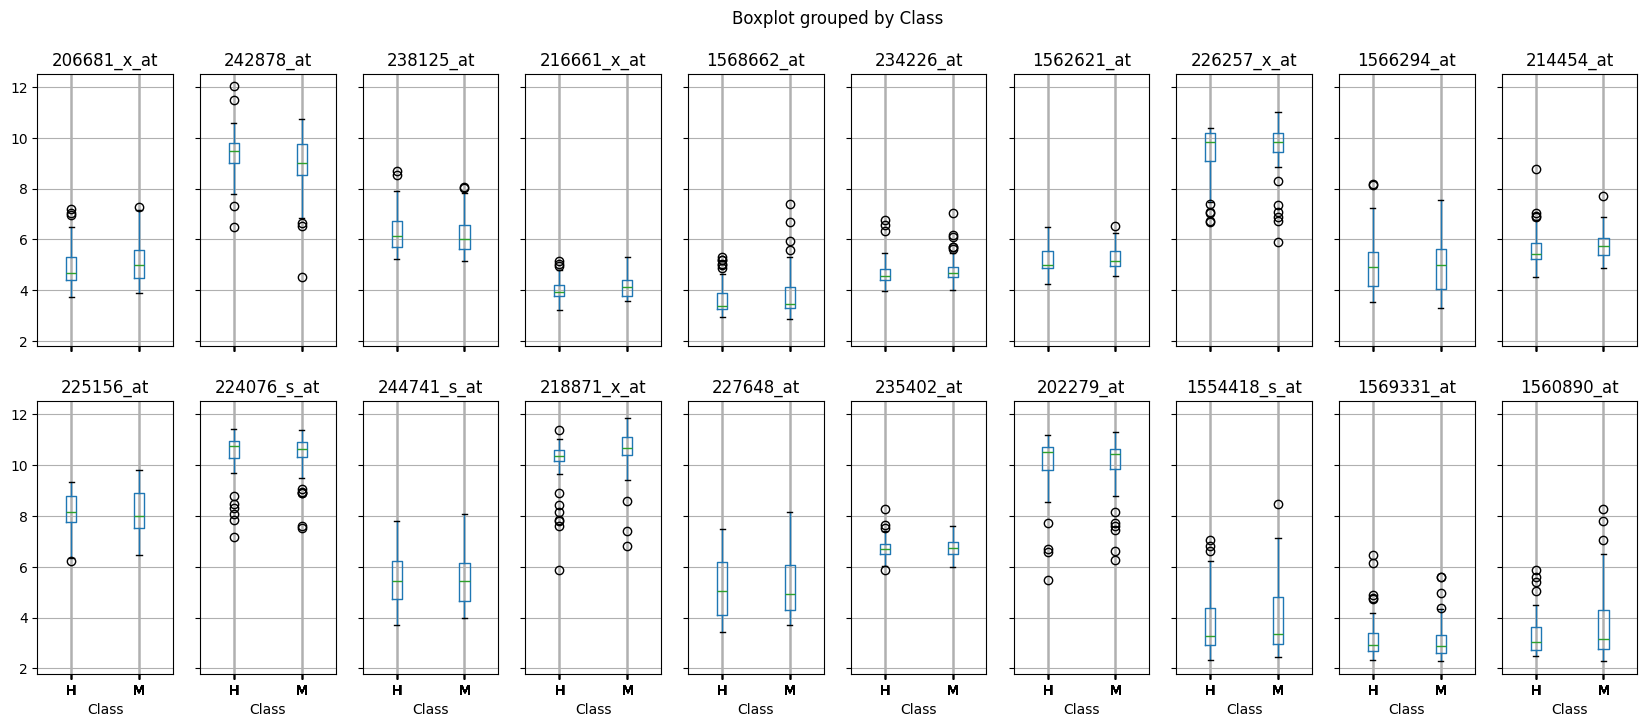

In [9]:
df.iloc[1:] = df.iloc[1:].apply(np.vectorize(float))
boxplot = df.T.boxplot(column=random_genes, by='Class', layout=(2,10), figsize=(20,8))
plt.show()

***b. WRS for differential expression (DE)***

1) Consider some gene, g. Under the null model (which assumes that 
for g there is no M vs H DE), what is the expected sum of ranks of 
g’s expression levels measured for samples labeled M?


Number of samples: $N=99$
Number of Myocardial samples (labeled $M$): $B=49$

$$
μ_T=\frac{B(N+1)}{2}=\frac{49(99+1)}{2}=2450
$$

In [10]:
samples_per_class = df.loc['Class'].value_counts()
N = df.shape[1]
B = samples_per_class['M']
expected_sum_of_ranks = (N + 1) * B / 2
print(f'Expected sum of ranks: {expected_sum_of_ranks}')

Expected sum of ranks: 2450.0


2) Denote this sum of ranks by RS(g). What is the maximal value, c, 
that RS(g) can take?


The maximum value occurs when all $M$ samples of $g$ are in the highest ranks
$$
RS(g) = c = \sum_{i=51}^{99}i=3675
$$

In [11]:

c = np.sum(np.arange(samples_per_class['H']+ 1, N+1))
print(f'c = {c}')

c = 3675


3) Under the null model, what is the probability of RS(g) = c? 
(Provide a formula for this and explain it)


In order to get all $M$ samples of $g$ in the highest ranks, there's only one way to order them in that way considering all of the possibilities of ordering the 49  M  samples within the 99 total samples.

$$
P(RS(g)=c)=\frac{1}{{N}\choose{B}} =\frac{1}{{99 \choose 49}}=1.98\times10^{-29}
$$

In [12]:
P_c = 1 / math.comb(N, B)
print(f'P(c) = {P_c}')

P(c) = 1.9823306042836678e-29


4) Under the null model, what is the probability of RS(g) = c-1? what is 
the probability of RS(g) = c-2? 
(Provide formulas and explain them)


The only option to get $RS(g)=c-1$ is by the first rank of $M$ which is in place 51 will switch to rank 50 and there is still only one way to order those $M$ samples.
Hence:

$$
P(RS(g)=c)=P(RS(g)=c-1)=\frac{1}{{99 \choose 49}}=1.98\times10^{-29}
$$

For $RS(g)=c-2$ there are 2 options:<br>
1. The sample that is ranked 51 will move 2 ranks down to 49.
2. The sample that is ranked 51 will move 1 rank down to 50 and the sample that is ranked 52 will move 1 rank down to 51.

$$
P(RS(g)=c-2)=2*\frac{1}{{99 \choose 49}}=3.96\times10^{-29}
$$

5) Draw a histogram of the values of RS(g) in the dataset. Here g 
ranges over all genes in the data (after the clean-up). Compute the 
IQR for this distribution and present it on the plot with the histogram.

In [13]:
df_transposed = df.T
ranked_df_transposed = df_transposed.apply(lambda x: rankdata(x, method='average'), axis=0)

M_rows = df_transposed[df_transposed['Class'] == 'M']
M_ranks = ranked_df_transposed.loc[M_rows.index]
M_ranks_sum = M_ranks.sum()


In [39]:
# Calculate the IRQ
Q1 = M_ranks_sum.quantile(0.25)
Q3 = M_ranks_sum.quantile(0.75)
IQR = Q3-Q1 

# Print the results
print(f"IQR: {IQR}")

IQR: 329.0


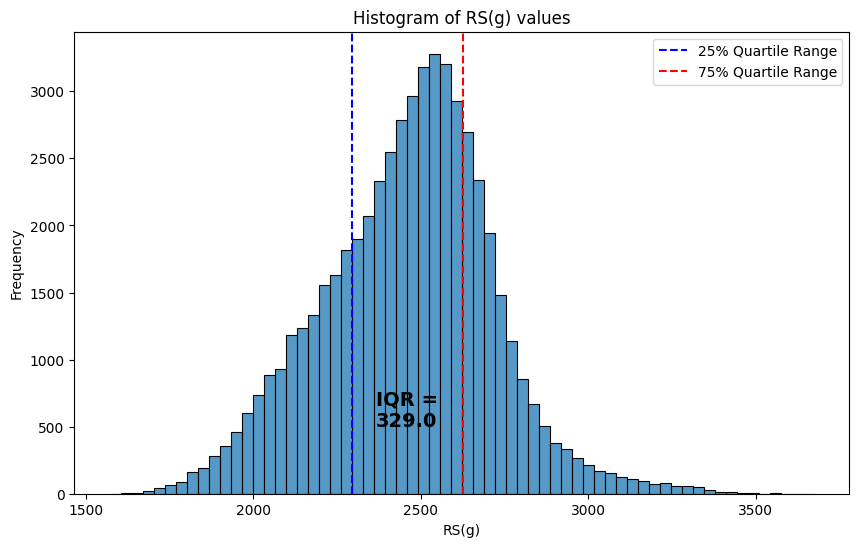

In [42]:
# Plot the histogram
plt.figure(figsize=(10,6))
sns.histplot(M_ranks_sum, bins=64, kde=False)
plt.axvline(Q1, color='b', linestyle='dashed', label='25% Quartile Range')
plt.axvline(Q3, color='r', linestyle='dashed',label='75% Quartile Range')
plt.legend()
plt.text(Q1 + 70, 500, f"IQR =\n{IQR}", color="k", fontsize=14,  fontweight='bold')
plt.ylabel('Frequency')
plt.xlabel('RS(g)')
plt.title('Histogram of RS(g) values')
plt.show()

**c. Differential Expression**

The purpose is to determine the statistical significance of 
differential expression (DE) observed for each gene in H vs M.
Evaluate the DE in both one-sided directions for every gene, 
using both Student t-test and WRS test. 
Report the number of genes overexpressed in M vs H (M > H) at 
a p-value better (≤) than 0.07 and separately genes 
underexpressed in M vs H (M < H) at a p-value better than 0.07. 
For both directions use both a Student t-test and a WRS test.

In [16]:
M_df = df.T.groupby('Class').get_group('M').T.iloc[1:].astype(float)
H_df = df.T.groupby('Class').get_group('H').T.iloc[1:].astype(float)

significant = pd.DataFrame(columns=['wrs_gt', 'wrs_lt', 't_test_gt', 't_test_lt'])

for g in tqdm(M_df.index):
    M_vals = M_df.loc[g]
    H_vals = H_df.loc[g]
    
    significant.loc[g, 'wrs_gt'] = ranksums(M_vals, H_vals, alternative='greater')
    significant.loc[g, 'wrs_lt'] = ranksums(M_vals, H_vals, alternative='less')
    significant.loc[g, 't_test_gt'] = ttest_ind(M_vals, H_vals, alternative='greater', random_state=42)
    significant.loc[g, 't_test_lt'] = ttest_ind(M_vals, H_vals, alternative='less', random_state=42)


  0%|          | 0/54628 [00:00<?, ?it/s]

In [17]:
stat_signif_p_values = significant.applymap(lambda x: x[1])

print('Wilcoxon Rank Sum test:')
print(f"Number of genes overexpressed M > H (p-value <= 0.07): {np.sum(stat_signif_p_values['wrs_gt'] <= 0.07)}")
print(f"Number of genes underexpressed M < H (p-value <= 0.07): {np.sum(stat_signif_p_values['wrs_lt'] <= 0.07)}")

print('\nT-test:')
print(f"Number of genes overexpressed M > H (p-value <= 0.07): {np.sum(stat_signif_p_values['t_test_gt'] <= 0.07)}")
print(f"Number of genes underexpressed M < H (p-value <= 0.07): {np.sum(stat_signif_p_values['t_test_lt'] <= 0.07)}")

Wilcoxon Rank Sum test:
Number of genes overexpressed M > H (p-value <= 0.07): 10787
Number of genes underexpressed M < H (p-value <= 0.07): 10667

T-test:
Number of genes overexpressed M > H (p-value <= 0.07): 8517
Number of genes underexpressed M < H (p-value <= 0.07): 8639


**d. Correlations**

Select the 80 most significant genes from each one of the one-sided WRS DE lists you computed in 3c. Generate a set of 160 
genes, D, which is the union of the above two sets.



In [18]:
gt_genes = list(stat_signif_p_values.nsmallest(80, columns=['wrs_gt']).index)
lt_genes = list(stat_signif_p_values.nsmallest(80, columns=['wrs_lt']).index)

signif_genes = gt_genes + lt_genes

D = df.loc[signif_genes].T.astype(float)

1) Compute Spearman $\rho$ correlations in all pairs within D (160 
choose 2 numbers). Represent the correlation matrix as a 160x160 
heatmap.

  0%|          | 0/160 [00:00<?, ?it/s]

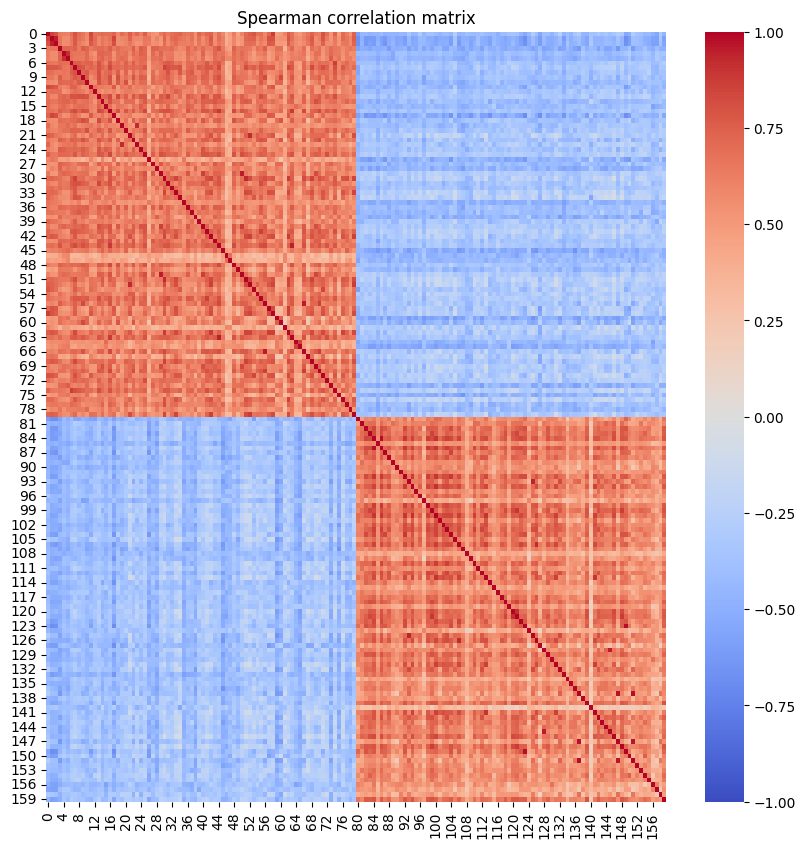

In [19]:
# Compute Spearman correlation coefficients for all pairs within D
correlation_matrix = np.zeros((len(D.columns), len(D.columns)))

for i in tqdm(range(len(D.columns))):
    for j in range(i, len(D.columns)):
        correlation_matrix[i, j] = spearmanr(D.iloc[:, i], D.iloc[:, j])[0]
        correlation_matrix[j, i] = correlation_matrix[i, j]

# Plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman correlation matrix')
plt.show()


2) Under a NULL model that assumes that genes are pairwise 
independent, what is the expected value for $\rho$? 


Under a null model that assumes genes are pairwise independent, the expected value for the Spearman correlation coefficient ($\rho$) is 0.

This is because under the assumption of independence, there is no systematic relationship between the ranks of the two variables being compared. Therefore, the Spearman correlation coefficient, which measures the strength and direction of monotonic relationships between variables, would be expected to be close to 0 on average.

In other words, if genes are pairwise independent, we wouldn't expect any consistent pattern of association between their ranks, resulting in an expected Spearman correlation coefficient of 0.

3) Now compute the Spearman $\rho$ correlations in all 80 choose 2 
pairs from the overexpressed genes in D. Present your results 
on a histogram. What is the average value you observed? 
Compare it to the value in the above section. Explain.


  0%|          | 0/80 [00:00<?, ?it/s]

Average Spearman correlation: 0.61


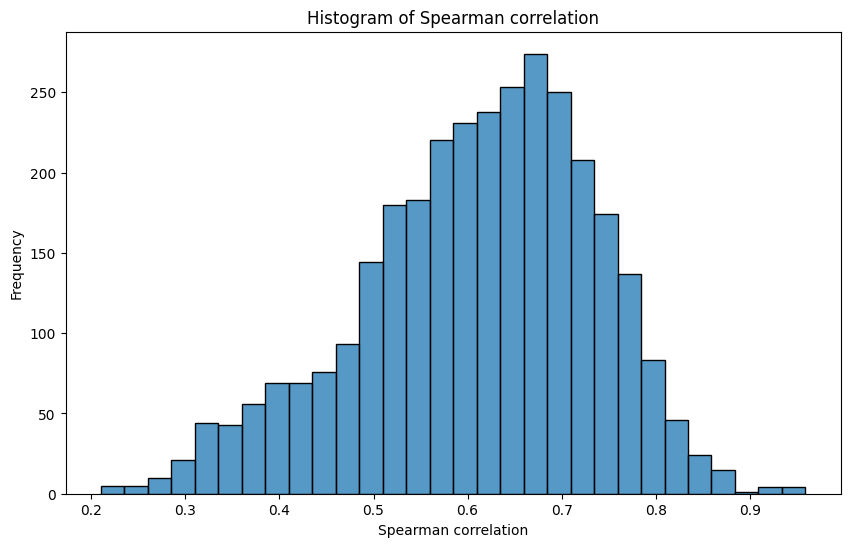

In [20]:
#compute the Spearman $\rho$ correlations in all 80 choose 2 pairs from the overexpressed genes in D.
D_overexpressed = df.loc[gt_genes].T.astype(float)

overexpressed_correlations = []
for i in tqdm(range(len(D_overexpressed.columns))):
    for j in range(i+1, len(D_overexpressed.columns)):
        overexpressed_correlations.append(spearmanr(D_overexpressed.iloc[:, i], D_overexpressed.iloc[:, j])[0])

print(f'Average Spearman correlation: {round(np.mean(overexpressed_correlations),2)}')

# Plot the histogram
plt.figure(figsize=(10,6))
sns.histplot(overexpressed_correlations, bins=30, kde=False)
plt.ylabel('Frequency')
plt.xlabel('Spearman correlation')
plt.title('Histogram of Spearman correlation')
plt.show()


Comparing this average value with the expected value of 0 under the null model of pairwise independence allow us to assess whether the observed correlations among overexpressed genes are significantly different from what would be expected under the null model. 

An average value is significantly different from 0, this suggests that there might be some underlying correlation structure among overexpressed genes.

4) What can you report about co-expression of genes in D (co-expression is inferred from the correlation of the expression 
levels of genes, across a set of samples)?


We can report that the genes that are overexpressed almost all have positive spearman correlations between each other, meaning that the higher gene expression for these genes the more likely to have a myocardial sample.

Same with the genes that underexpressed, the higher gene expression for these genes the more likely to have a healthy sample.

Having negative spearman correlations between the overexpressed and underexpressed genes, means that the higher the gene expression of the overexpressed genes is and the lower the gene expression of the underexpressed genes is the more likely to have a myocardial sample, and vice versa the more likely to have a healthy sample.

5) What can you say about how many co-expressed pairs we 
would observe (in the entire dataset) at FDR=0.05? Explain 
your answer.


To calculate the number of co-expressed pairs in the entire dataset at $FDR=0.05$, we should count the pairs of genes (out of all possible pairs) whose p-value in the empirical FDR equation meets the defined FDR threshold.<br>Given that our dataset contains 54,628 distinct genes with no missing values,using the following formula:

$FDR(i) = \frac{p⋅N}{i} = 0.05 $

The null model predicts that we will have ${54628 \choose 2} \cdot 0.05 ≈ 7.5 \cdot 10^7$ pairs of genes at FDR = 0.05

6) What would have been advantages and disadvantages of 
computing co-expression for all genes in the study rather than 
only for genes in D? 

**Advantages**:

**Comprehensive Analysis**: Computing co-expression for all genes allows for a more comprehensive analysis of the entire transcriptome, enabling the identification of co-expression patterns across a wide range of genes.

**Discovery of Novel Associations**: Analyzing co-expression for all genes may reveal novel associations and regulatory relationships that were not previously known or explored. This approach can lead to the discovery of new biological pathways, regulatory mechanisms, and potential biomarkers.

**Contextual Understanding**: Understanding the co-expression patterns of genes beyond the subset in matrix D provides a broader context for interpreting the functional relationships and regulatory networks within the transcriptome. It allows researchers to gain insights into the global organization and dynamics of gene expression in the studied system.

**Disadvantages**:

**Computational Complexity**: Analyzing co-expression for all genes in the study entails a significantly higher computational burden compared to focusing on a subset of genes. This can require more computational resources, time, and processing power.

**Multiple Testing Correction***: When analyzing co-expression for a large number of genes, multiple testing correction becomes more critical to control the false discovery rate. This may require more stringent significance thresholds or adjustment methods, potentially leading to fewer significant associations being detected.

**Noise and Redundancy**: Including all genes in the analysis may introduce noise and redundancy, as not all genes are biologically relevant or informative for a particular research question. This can dilute the signal of true co-expression relationships and make it more challenging to interpret the results.

**Data Interpretation Complexity**: Analyzing co-expression for a large number of genes can lead to complex and challenging data interpretation. Identifying biologically meaningful patterns and distinguishing them from random correlations or technical artifacts becomes more difficult when dealing with a vast amount of data.

**e. Plots and Conclusions of the DE and correlation analysis**

1) Construct the DE overabundance plots (blue and green lines as shown in class) for $M$ vs $H$ overexpression (higher expression levels in $M$) using $WRS$ and t-test using the results you had computed in Section $3c$.
State, for each comparison, the number of genes, k, at which we observe with an FDR threshold of:<br>
a) $\tau = 0.05$<br>
b) $\tau = 0.01$<br>
c) $\tau = 0.005$<br>
If these events are not observed at any $k>0$, then make that statement.

In [21]:
def calc_FDR(th, p_values):
    m = len(p_values)
    FDR_list = []
    FDR = 0
    for i in range(m):
        FDR = p_values[i] * m / (i+1)
        if FDR > th:
            break
        else:
            FDR_list.append(FDR)

    return FDR_list

In [22]:
tau_list = [0.05, 0.01, 0.005]

# WRS calculation of K by threshold
wrs_p_values = stat_signif_p_values.T.loc["wrs_gt"].tolist()
wrs_p_values = sorted(wrs_p_values)
K_values= []
for threshold in tau_list:
    k = calc_FDR(threshold, wrs_p_values)
    K_values.append(k)

# t-test calculation of K by threshold
t_test_p_values = stat_signif_p_values.T.loc["t_test_gt"].tolist()
t_test_p_values = sorted(t_test_p_values)
K_values_t_test= []
for threshold in tau_list:
    k = calc_FDR(threshold, t_test_p_values)
    K_values_t_test.append(k)
    


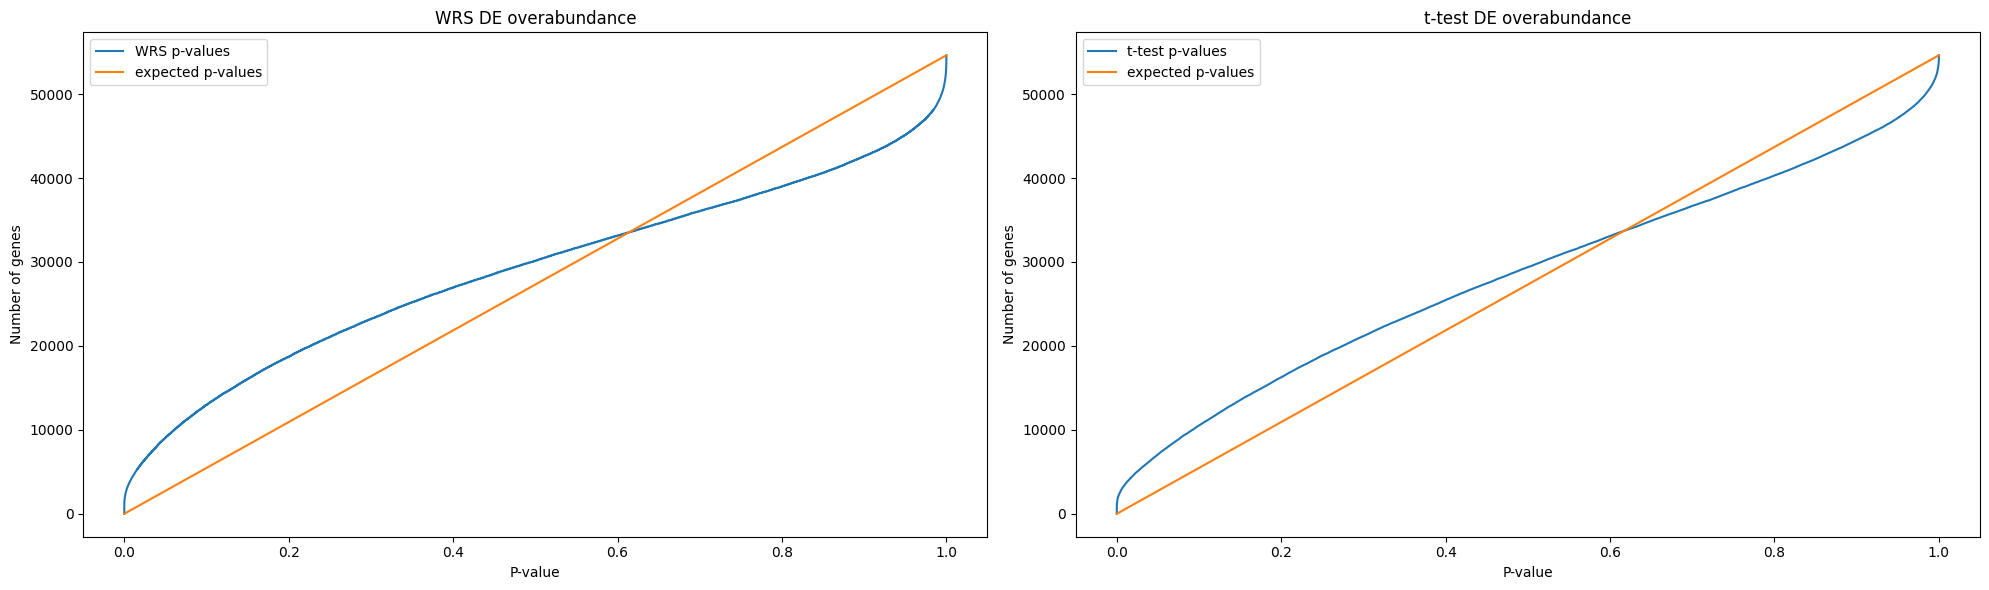

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot WRS DE overabundance
wrs_p_values_expected = np.linspace(0, 1.0, len(wrs_p_values))
axes[0].plot(wrs_p_values, range(len(wrs_p_values)), label='WRS p-values')
axes[0].plot(wrs_p_values_expected,  range(len(wrs_p_values)), label='expected p-values')
axes[0].set_xlabel('P-value') 
axes[0].set_ylabel('Number of genes')
axes[0].set_title('WRS DE overabundance')
axes[0].legend()

# Plot t-test DE overabundance
t_test_p_values_expected = np.linspace(0, 1.0, len(t_test_p_values))
axes[1].plot(t_test_p_values, range(len(t_test_p_values)), label='t-test p-values')
axes[1].plot(t_test_p_values_expected,  range(len(t_test_p_values)), label='expected p-values')
axes[1].set_xlabel('P-value')
axes[1].set_ylabel('Number of genes')
axes[1].set_title('t-test DE overabundance')
axes[1].legend()

plt.tight_layout()
plt.show()

In [24]:
# print the number of genes for each threshold
print(f'WRS')
print(f'Number of genes for threshold 0.05: {len(K_values[0])}')
print(f'Number of genes for threshold 0.1: {len(K_values[1])}')
print(f'Number of genes for threshold 0.005: {len(K_values[2])}\n')

print(f'T-test')
print(f'Number of genes for threshold 0.05: {len(K_values_t_test[0])}')
print(f'Number of genes for threshold 0.1: {len(K_values_t_test[1])}')
print(f'Number of genes for threshold 0.005: {len(K_values_t_test[2])}')


WRS
Number of genes for threshold 0.05: 2784
Number of genes for threshold 0.1: 1601
Number of genes for threshold 0.005: 1323

T-test
Number of genes for threshold 0.05: 2104
Number of genes for threshold 0.1: 1305
Number of genes for threshold 0.005: 1104


2) For any given gene, g, consider the following set of p-values:<br>

𝑆(𝑔) = {𝑝(𝜆)|𝑝(𝜆) 𝑖𝑠 𝑎 𝑊𝑅𝑆 𝑝−𝑣𝑎𝑙𝑢𝑒 𝑓𝑜𝑟 𝑜𝑣𝑒𝑟𝑒𝑥𝑝𝑟𝑒𝑠𝑠𝑖𝑜𝑛 𝑖𝑛 𝑀 𝑎𝑓𝑡𝑒𝑟 s𝑤𝑎𝑝𝑝𝑖𝑛𝑔 𝑜𝑛𝑒 𝑙𝑎𝑏𝑒𝑙}

(In the above definition 𝜆 represents a label swap – there are 99 such swaps).
Let 
$𝑝_𝑈(𝑔) = max_{𝜆} 𝑆(𝑔)$

In words: $𝑝_𝑈(𝑔)$ represents the maximum p-value that could have been obtained for $g$, assuming a single labeling error.

Comment: The process you ran in this section yields a set of genes called Robust Differentially Expressed Genes (RDEG).

2.a. For all genes, compute $𝑝_𝑈(𝑔)$.

After obtaining the set 𝑆(𝑔) of p-values for the gene g, we subtract 𝑝(𝜆) from the data set 𝑆(𝑔) and then take the maximum of the original set 𝑆(𝑔) and the set of swapped p-values that we computed earlier. Finally, we compute the maximum value in the set that we got. This is the value 𝑝𝑈(𝑔)

In [32]:
df_swapped = df.copy()
max_p_values = []

# Pre-compute and convert values to numpy array
values = df_swapped.loc[df_swapped.index[1:]].values.astype(float)

# Pre-compute mask for 'Class' row
class_mask = df_swapped.loc['Class'] == 'M'
class_mask_np = class_mask.to_numpy()

for i in tqdm(range(values.shape[0])):
    max_p_val = 0
    for j in range(values.shape[1]):
        class_mask_np[j] = not class_mask_np[j]
        
        M_vals = values[i, class_mask_np]
        H_vals = values[i, ~class_mask_np]

        # Calculate the p-value for the current sample
        max_p_val = max(max_p_val, ranksums(M_vals, H_vals, alternative='greater').pvalue)
        
        class_mask_np[j] = not class_mask_np[j]

    max_p_values.append((df_swapped.index[i+1], max_p_val))

max_p_values.sort(key=lambda x: x[1])

  0%|          | 0/54628 [00:00<?, ?it/s]

2.b. Run the FDR procedure with $ \tau= 0.05$ using $𝑝_𝑈(𝑔)$ (instead of the original p-values as computed in 
section 3e1a above). How many genes can you report now?

In [33]:
p_values = [float(x[1]) for x in max_p_values]

k = calc_FDR(0.05, p_values)
print(f'Number of genes with 𝜏 = 0.05 using 𝑝𝑈(𝑔): {len(k)}')

Number of genes with 𝜏 = 0.05 using 𝑝𝑈(𝑔): 1847


2.c. What is the intersection of the genes you can report above with the results of 3e1a. Explain.

In [34]:
# Get the genes and their p-values from 3e1a in a list (gene, p-value)
M_df = df.T.groupby('Class').get_group('M').T.iloc[1:].astype(float)
H_df = df.T.groupby('Class').get_group('H').T.iloc[1:].astype(float)

p_val_3e1a = [] 
for gene in tqdm(M_df.index):
    M_vals = M_df.loc[gene]
    H_vals = H_df.loc[gene]
    p_value = ranksums(M_vals, H_vals, alternative='greater')[1]
    p_val_3e1a.append((gene, p_value))

p_val_3e1a.sort(key=lambda x: x[1])

  0%|          | 0/54628 [00:00<?, ?it/s]

In [35]:
pU_val_3e2b = [x[0] for x in max_p_values[:len(k)]]
p_val_3e1a= [x[0] for x in p_val_3e1a[:len(K_values[0])]]

print(f'Number of genes in the intersection: {len(set(p_val_3e1a).intersection(pU_val_3e2b))}')

Number of genes in the intersection: 1847


The intersection of genes from sample *b* and *3e1a* is a subset of each. 

A gene's Pu value (`Pu(g)`), which represents the maximum p-value that could have been obtained with a single labeling error, is likely greater or equal to its P-value. 

This can be represented by the following equation:

```
Pu(g) >= pval(g)
```
The above may not be absolutely the case, unless `Pu(g)` was defined taking into account a scenario of zero labeling error. 

When considering 1847 genes, we expect:

```
Pu(g) >= pval(g)
```

Consequently, if a gene passes the FDR procedure with `τ = 0.05` based on its `Pu(g)` value, it might also pass the FDR procedure when it's based on its P-value:

```
Pu(g) >= pval(g), ∀ τ = 0.05
```

This correlates with the finding that the intersection of genes from sample *b* and *3e1a* matches the set of genes from sample *b*. Hence, we can report 1847 genes in the intersection of sample *b* and *3e1a*, equal to the number of genes in sample *b*.

3) Select any 3 differentially expressed genes, from D (which 
was defined in 3d), and produce a graphical representation of 
their expression patterns that demonstrates the observed DE.

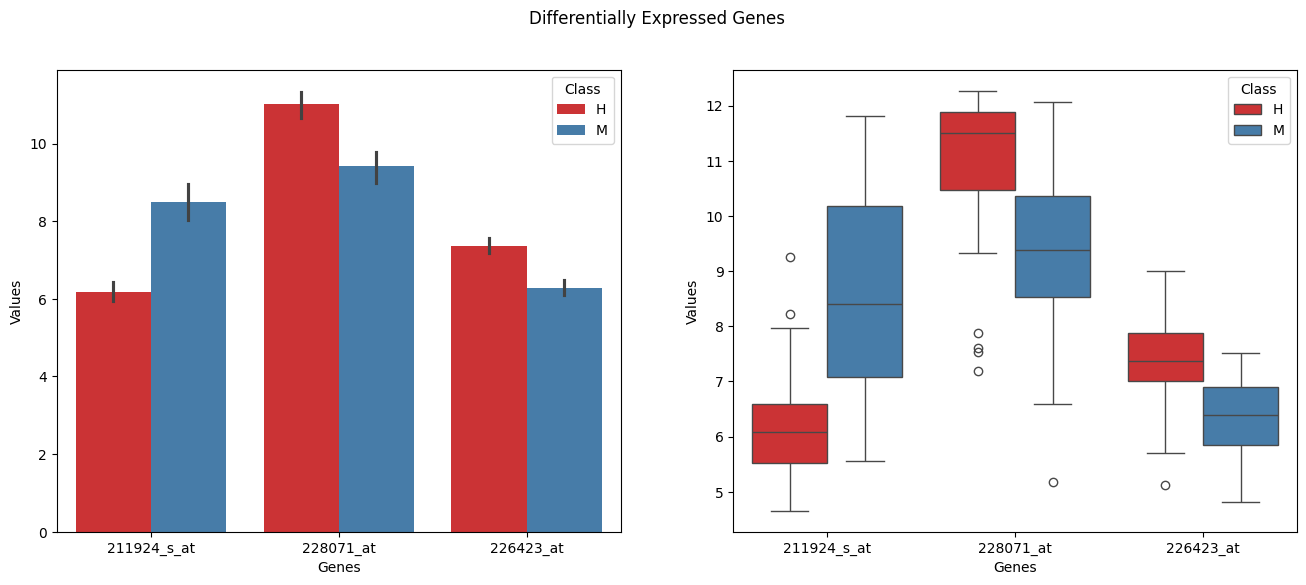

In [36]:
# set the Dataframe for these genes
df_de_genes = df.T[['211924_s_at', '228071_at', '226423_at', 'Class']]

# fix the table structure for the visualization
df_de_genes = df_de_genes.melt(id_vars=['Class'], var_name='Genes', value_name='Values')

# visualization
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.0, 6.0))
df_de_genes['Class'] = df_de_genes['Class'].replace({0: 'H', 1: 'M'})
sns.barplot(x='Genes', y='Values', hue='Class', data=df_de_genes, palette="Set1", ax=ax1)
sns.boxplot(x='Genes', y='Values', hue='Class', data=df_de_genes, palette="Set1", ax=ax2)
f.suptitle('Differentially Expressed Genes')
plt.show()



4) Heatmap
Draw a heatmap representation of the expression values of 
the genes in D (from 3d), across the entire cohort (all 
samples). Order the genes and the samples to produce the 
maximal visual effect.

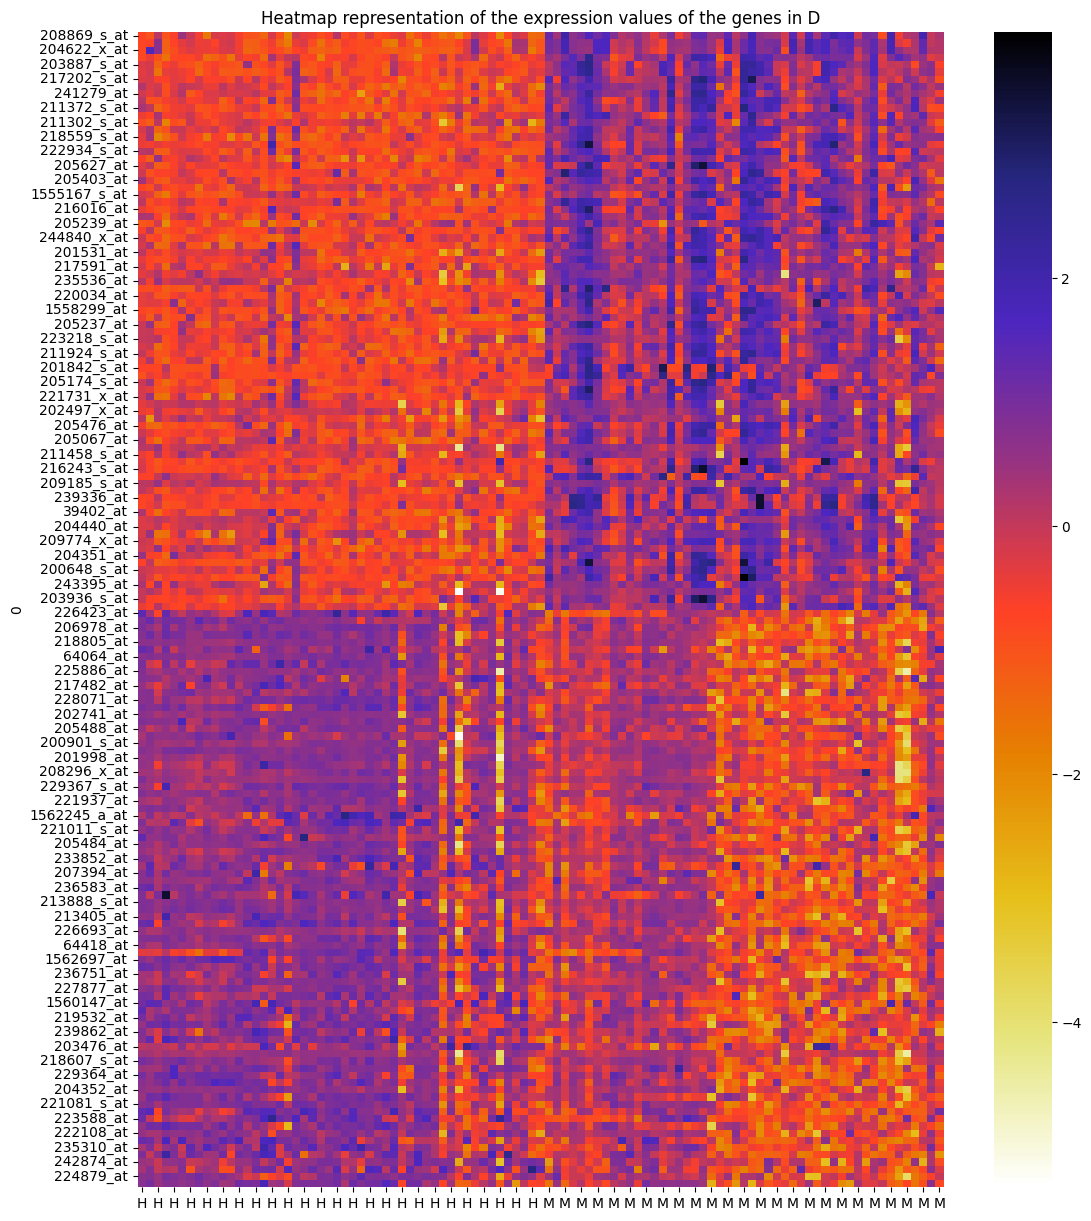

In [37]:
H_df.columns = ['H'] * H_df.shape[1]
M_df.columns = ['M'] * M_df.shape[1]

temp = pd.concat((H_df.loc[signif_genes].T, M_df.loc[signif_genes].T)).T
df_norm_row = temp.apply(lambda x: (x-x.mean())/x.std(), axis = 1)
plt.figure(figsize=(13,15))
sns.heatmap(df_norm_row, cmap='CMRmap_r')
plt.title("Heatmap representation of the expression values of the genes in D")
plt.show()